In [16]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from mne_connectivity import spectral_connectivity_epochs
from mne.datasets import sample

In [5]:
fs = 250  # sampling rate (Hz)
n_e = 300  # number of epochs
T = 10  # length of epochs (s)
f = 10  # frequency of sinusoids (Hz)
t = np.arange(0, T, 1 / fs)
A = 1  # noise amplitude
sigma = 0.5  # Gaussian noise variance

data=[]

phase_differences = [0, -np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
for ps in zip(phase_differences):
    sig = []
    for _ in range(n_e):
        sig.append(np.sin(2 * np.pi * f * t - ps) +
                   A * np.random.normal(0, sigma, size=t.shape))
    data.append(sig)


data=np.swapaxes(np.array(data), 0, 1)  # make epochs the first dimension

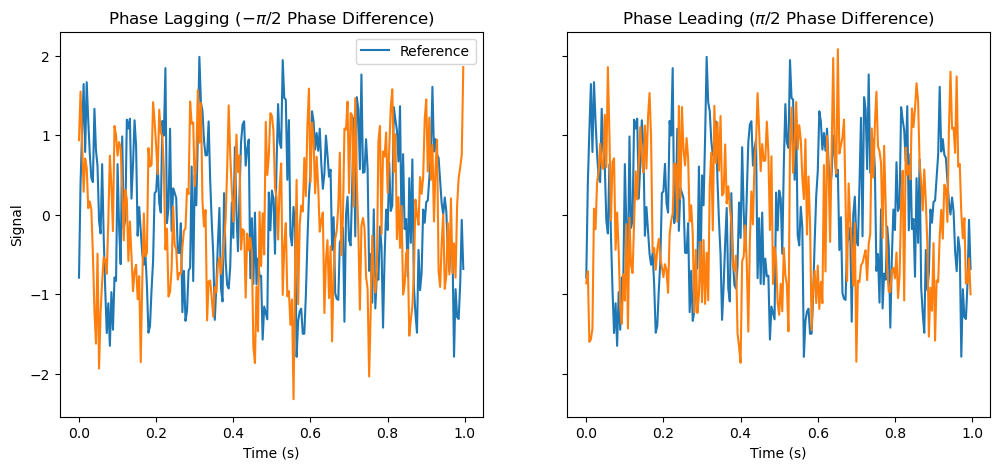

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax[0].plot(t[:fs], data[0, 0, :fs], label="Reference")
ax[0].plot(t[:fs], data[0, 2, :fs])

ax[0].set_title(r"Phase Lagging ($-\pi/2$ Phase Difference)")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Signal")
ax[0].legend()

ax[1].plot(t[:fs], data[0, 0, :fs], label="Reference")
ax[1].plot(t[:fs], data[0, 4, :fs])
ax[1].set_title(r"Phase Leading ($\pi/2$ Phase Difference)")
ax[1].set_xlabel("Time (s)")

plt.show()

## Demo on MEG DATA

In [17]:
data_path = sample.data_path()
raw_fname = data_path / 'MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = data_path / 'MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'
raw = mne.io.read_raw_fif(raw_fname)
events = mne.read_events(event_fname)

Opening raw data file /home/paosoriom/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


In [20]:
#Getting the attributes of raw object
#Getting the data of the EEG signal in a 2d matrix, where each row is a channel and each column is a time point
#Getting the sampling frequency of the EEG signal


['__class__', '__contains__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_annotations', '_cals', '_check_bad_segment', '_comp', '_cropped_samp', '_dtype', '_dtype_', '_filenames', '_first_samps', '_first_time', '_get_buffer_size', '_get_channel_positions', '_getitem', '_handle_tmin_tmax', '_init_kwargs', '_last_samps', '_last_time', '_orig_units', '_parse_get_set_params', '_pick_drop_channels', '_pick_projs', '_preload_data', '_projector', '_projectors', '_raw_extras', '_raw_lengths', '_read_comp_grade', '_read_picks', '_read_raw_file', '_read_segment', '_read_segment_file', '_reconstruct_proj', '_repr_html_', '_set_channel_po